## Style-GAN 2 ADA for generating animated face images

In [1]:
!nvidia-smi

Fri May 19 18:54:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Loaded the stylegan2 pretrained model

In [2]:
!git clone https://github.com/dvschultz/stylegan2-ada-pytorch
%cd stylegan2-ada-pytorch
!mkdir downloads
!mkdir datasets
!mkdir pretrained

RAW_IMAGES_DIR = '/content/src_img'  # store src images here
ALIGNED_IMAGES_DIR = '/content/aligned_images'

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 544, done.
remote: Total 544 (delta 0), reused 0 (delta 0), pack-reused 544
Receiving objects: 100% (544/544), 8.42 MiB | 7.78 MiB/s, done.
Resolving deltas: 100% (308/308), done.
/content/stylegan2-ada-pytorch


In [3]:
#Uninstall new JAX
!pip uninstall jax jaxlib -y
#GPU frontend
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
#CPU frontend 
#!pip install jax[cpu]==0.3.10
#Downgrade Pytorch

#!pip install torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torch==1.8.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install timm==0.4.12 ftfy==6.1.1 ninja==1.10.2 opensimplex

Found existing installation: jax 0.4.8
Uninstalling jax-0.4.8:
  Successfully uninstalled jax-0.4.8
Found existing installation: jaxlib 0.4.7+cuda11.cudnn86
Uninstalling jaxlib-0.4.7+cuda11.cudnn86:
  Successfully uninstalled jaxlib-0.4.7+cuda11.cudnn86
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.7/939.7 kB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.7/175.7 MB 4.5 MB/s eta 0:00:00
  Created wheel for jax: filename=jax-0.3.10-py3-none-any.whl size=1088052 sha256=243686143967d12e99e5575f64ac4fa658951ff7106cfc29e6e9235af6bd1692
  Stored in directory: /root/.cache/pip/wheels/41/b8/74/0e87ee9c40aa5187c299d70fc5b0ceffcbb124175b8873eaed
Successfully built jax
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2

In [4]:
!python --version 

Python 3.10.11


In [5]:
!pip uninstall torch torchvision -y
!pip install torch==1.12.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
Found existing installation: torchvision 0.15.2+cu118
Uninstalling torchvision-0.15.2+cu118:
  Successfully uninstalled torchvision-0.15.2+cu118
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 966.0 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.12 requires torchvision>=0.8.2, which is not installed.
timm 0.4.12 requires torchvision, which is not installed.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.12.1+cu113 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.12.1+cu113 which is in

In [6]:
# for local installation od torch
#!pip install /media/saniya/76E8-CACF/torch-1.9.0+cu111-cp39-cp39-linux_x86_64.whl

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the pre-trained weights stylegan 2 trained for FFHQ (face) dataset 

In [8]:
%cd pretrained
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
%cd ../

/content/stylegan2-ada-pytorch/pretrained
--2023-05-19 18:58:14--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 52.84.251.69, 52.84.251.32, 52.84.251.108, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|52.84.251.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  22.4MB/s    in 18s     

2023-05-19 18:58:34 (19.7 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]

/content/stylegan2-ada-pytorch


In [9]:
!ls

apply_factor.py		      metrics
blend_models.py		      Network_Blending_ADA_PT.ipynb
calc_metrics.py		      pbaylies_projector.py
closed_form_factorization.py  pretrained
combine_npz.py		      projector.py
datasets		      README.md
dataset_tool.py		      SG2-ADA-PT_AudioReactive+Pitch.ipynb
dnnlib			      SG2_ADA_PT_to_Rosinality.ipynb
Dockerfile		      SG2_ADA_PyTorch.ipynb
docker_run.sh		      StyleCLIP_playground.ipynb
docs			      StyleGAN2_CLIP_approach_v1.ipynb
downloads		      style_mixing.py
export_weights.py	      torch_utils
flesh_digression.py	      training
generate.py		      train.py
legacy.py		      util
LICENSE.txt


### Extract the aligned cartoon images scraped from true-beauty

In [10]:
import zipfile
# For extracting aligned images
dataset_path_zip = "/content/drive/MyDrive/align_image.zip"
dataset_path_aligned = "/content/aligned_images"

# Open the zip file
with zipfile.ZipFile(dataset_path_zip, 'r') as zip_ref:
    # Extract all the files to the current directory
    zip_ref.extractall(dataset_path_aligned)
    
print("Zip file extracted successfully.")

Zip file extracted successfully.


In [8]:
# This is used if raw crawledd data is used

# Set the path of the zip file
#dataset_path = "./datasets/trueBeauty.zip"

# Open the zip file
#with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
#    # Extract all the files to the current directory
#    zip_ref.extractall(dataset_path_og)
    
#print("Zip file extracted successfully.")

In [9]:
# This is to be done for RAW data

# convert the png 32 bit image to 24 bit image (RGB- 24 bit images)
#from PIL import Image
#import os

# Iterate over each file in the folder
#for filename in os.listdir(dataset_path_og):
#    # Check if file is a PNG image
#    if filename.endswith(".jpg"):
        # Set path to the PNG image
#        file_path = os.path.join(dataset_path_og, filename)
        
        # Open the image and convert it to 24 bit
#        img = Image.open(file_path).convert('RGB')
        
        # Save the converted image in place of the original image
#        img.save(file_path)
        
#print("Conversion complete.")

In [11]:
!pip install setuptools==59.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 29.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 59.5.0 which is incompatible.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 59.5.0 which is incompatible.
tensorflow 2.12.0 requires jax>=0.3.15, but you have jax 0.3.10 which is incompatible.


In [10]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# do this for raw images
#!python dataset_tool.py --source $dataset_path_og --dest $dataset_path_scaled_small --width 256 --height 256

Usage: dataset_tool.py [OPTIONS]
Try 'dataset_tool.py --help' for help.

Error: Missing option '--dest'.


### Hyper-parameters

In [12]:
#Required
dataset_path = dataset_path_aligned
#resume_from = './results/00012-trueBeauty_sdg-mirror-11gb-gpu-gamma50-bg-resumecustom-freezed2/network-snapshot-000004.pkl'
resume_from = './pretrained/ffhq.pkl'
aug_strength = 0
train_count = 0
mirror_x = True
#mirror_y = False

#optional: you might not need to edit these
gamma_value = 50.0
augs = 'bg'
config = '11gb-gpu'
snapshot_count = 1
freeze_count = 4

In [13]:
# training code 
!python train.py --gpus=1 --cfg=$config --metrics=None --freezed=$freeze_count --outdir=./results --data=$dataset_path --snap=$snapshot_count --resume=$resume_from --augpipe=$augs --initstrength=$aug_strength --gamma=$gamma_value --mirror=$mirror_x --mirrory=False --nkimg=$train_count

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [14]:
!gdown https://drive.google.com/uc?id=1q31zAaSYpi2Dcr_i4Axir73k9CBbrwHu

Downloading...
From: https://drive.google.com/uc?id=1q31zAaSYpi2Dcr_i4Axir73k9CBbrwHu
To: /content/stylegan2-ada-pytorch/network-snapshot-000012.pkl
100% 357M/357M [00:07<00:00, 48.7MB/s]


In [15]:
model_test = '/content/stylegan2-ada-pytorch/network-snapshot-000012.pkl'
!python generate.py --outdir=/content/out/images/ --trunc=0.8 --seeds=0 --network=$model_test

/content/stylegan2-ada-pytorch/generate.py:59: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  elif(len(seeds) is not 3):
Loading networks from "/content/stylegan2-ada-pytorch/network-snapshot-000012.pkl"...
Generating image for seed 0 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


### Face alignment of the celebA images (test images)

In [16]:
!pip install face_alignment
import sys
import os

import numpy as np
import scipy.ndimage
import PIL.Image
import face_alignment
def image_align(src_file, dst_file, face_landmarks, output_size=256, transform_size=1024, enable_padding=True):
        # Align function from FFHQ dataset pre-processing step
        # https://github.com/NVlabs/ffhq-dataset/blob/master/download_ffhq.py

        lm = np.array(face_landmarks)
        lm_chin          = lm[0  : 17, :2]  # left-right
        lm_eyebrow_left  = lm[17 : 22, :2]  # left-right
        lm_eyebrow_right = lm[22 : 27, :2]  # left-right
        lm_nose          = lm[27 : 31, :2]  # top-down
        lm_nostrils      = lm[31 : 36, :2]  # top-down
        lm_eye_left      = lm[36 : 42, :2]  # left-clockwise
        lm_eye_right     = lm[42 : 48, :2]  # left-clockwise
        lm_mouth_outer   = lm[48 : 60, :2]  # left-clockwise
        lm_mouth_inner   = lm[60 : 68, :2]  # left-clockwise

        # Calculate auxiliary vectors.
        eye_left     = np.mean(lm_eye_left, axis=0)
        eye_right    = np.mean(lm_eye_right, axis=0)
        eye_avg      = (eye_left + eye_right) * 0.5
        eye_to_eye   = eye_right - eye_left
        mouth_left   = lm_mouth_outer[0]
        mouth_right  = lm_mouth_outer[6]
        mouth_avg    = (mouth_left + mouth_right) * 0.5
        eye_to_mouth = mouth_avg - eye_avg

        # Choose oriented crop rectangle.
        x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]
        x /= np.hypot(*x)
        x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
        y = np.flipud(x) * [-1, 1]
        c = eye_avg + eye_to_mouth * 0.1
        quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
        qsize = np.hypot(*x) * 2

        # Load in-the-wild image.
        if not os.path.isfile(src_file):
            print('\nCannot find source image. Please run "--wilds" before "--align".')
            return
        img = PIL.Image.open(src_file)

        # Shrink.
        shrink = int(np.floor(qsize / output_size * 0.5))
        if shrink > 1:
            rsize = (int(np.rint(float(img.size[0]) / shrink)), int(np.rint(float(img.size[1]) / shrink)))
            img = img.resize(rsize, PIL.Image.ANTIALIAS)
            quad /= shrink
            qsize /= shrink

        # Crop.
        border = max(int(np.rint(qsize * 0.1)), 3)
        crop = (int(np.floor(min(quad[:,0]))), int(np.floor(min(quad[:,1]))), int(np.ceil(max(quad[:,0]))), int(np.ceil(max(quad[:,1]))))
        crop = (max(crop[0] - border, 0), max(crop[1] - border, 0), min(crop[2] + border, img.size[0]), min(crop[3] + border, img.size[1]))
        if crop[2] - crop[0] < img.size[0] or crop[3] - crop[1] < img.size[1]:
            img = img.crop(crop)
            quad -= crop[0:2]

        # Pad.
        pad = (int(np.floor(min(quad[:,0]))), int(np.floor(min(quad[:,1]))), int(np.ceil(max(quad[:,0]))), int(np.ceil(max(quad[:,1]))))
        pad = (max(-pad[0] + border, 0), max(-pad[1] + border, 0), max(pad[2] - img.size[0] + border, 0), max(pad[3] - img.size[1] + border, 0))
        if enable_padding and max(pad) > border - 4:
            pad = np.maximum(pad, int(np.rint(qsize * 0.3)))
            img = np.pad(np.float32(img), ((pad[1], pad[3]), (pad[0], pad[2]), (0, 0)), 'reflect')
            h, w, _ = img.shape
            y, x, _ = np.ogrid[:h, :w, :1]
            mask = np.maximum(1.0 - np.minimum(np.float32(x) / pad[0], np.float32(w-1-x) / pad[2]), 1.0 - np.minimum(np.float32(y) / pad[1], np.float32(h-1-y) / pad[3]))
            blur = qsize * 0.02
            img += (scipy.ndimage.gaussian_filter(img, [blur, blur, 0]) - img) * np.clip(mask * 3.0 + 1.0, 0.0, 1.0)
            img += (np.median(img, axis=(0,1)) - img) * np.clip(mask, 0.0, 1.0)
            img = PIL.Image.fromarray(np.uint8(np.clip(np.rint(img), 0, 255)), 'RGB')
            quad += pad[:2]

        # Transform.
        img = img.transform((transform_size, transform_size), PIL.Image.QUAD, (quad + 0.5).flatten(), PIL.Image.BILINEAR)
        if output_size < transform_size:
            img = img.resize((output_size, output_size), PIL.Image.ANTIALIAS)

        # Save aligned image.
        img.save(dst_file, 'PNG')


if not os.path.exists(ALIGNED_IMAGES_DIR):
    os.makedirs(ALIGNED_IMAGES_DIR)

landmarks_detector = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, flip_input=False)

for img_name in os.listdir(RAW_IMAGES_DIR):
    raw_img_path = os.path.join(RAW_IMAGES_DIR, img_name)

    for i, face_landmarks in enumerate(landmarks_detector.get_landmarks(raw_img_path), start=1):
 
        aligned_face_path = os.path.join(ALIGNED_IMAGES_DIR, f'align-{img_name}')

        image_align(raw_img_path, aligned_face_path, face_landmarks)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for face_alignment: filename=face_alignment-1.3.5-py2.py3-none-any.whl size=28239 sha256=3923b19c39438c9ca8dd3504e2dbe468a447911ef6c2a13266507bb5564074a7
  Stored in directory: /root/.cache/pip/wheels/97/4f/65/48940e0c8eabe818a5170a1117777520718d5a875a25626789
Successfully built face_alignment


Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


  0%|          | 0.00/85.7M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip


  0%|          | 0.00/91.9M [00:00<?, ?B/s]

Downloading: "https://www.adrianbulat.com/downloads/python-fan/depth-6c4283c0e0.zip" to /root/.cache/torch/hub/checkpoints/depth-6c4283c0e0.zip


  0%|          | 0.00/224M [00:00<?, ?B/s]

In [17]:
#align the image first
target_img = '/content/aligned_images/align-target.png'

### Projection to create cartoon iages of the given celeb

In [18]:
!python projector.py --network=$model_test --outdir=/content/projector/ --target=$target_img --num-steps=200 --seed=0

Loading networks from "/content/stylegan2-ada-pytorch/network-snapshot-000012.pkl"...
Computing W midpoint and stddev using 10000 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1130: UserWarning: operator() profile_node %106 : int = prim::profile_ivalue(%104)
 does not have profile information (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:104.)
  return forward_call(*input, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1130: UserWarning: concrete shape for bias input is required to decompose into conv + bias (Triggered internally at  ../torch/csrc/jit/codegen/cuda/graph_fuser.cpp:2233.)
  return forward_call(*input, **kwargs)
step    1/200: dist 0.72 loss 9555.92
step    2/200: dist 0.73 loss 13247.65
step    3/200: dist 0.71 loss 11507.06
step    4/200: dist 0.72 loss 8733.96
step    5/200: d

# Utils

In [19]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install imageio[ffmpeg]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
#!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metrics/inception-2015-12-05.pt
#!mv inception-2015-12-05.pt pretrained/.

### Metrics calculation

In [24]:
!python calc_metrics.py --network=$model_test --metrics=fid50k_full --data=/content/aligned_images/align_image --mirror=1

Loading network from "/content/stylegan2-ada-pytorch/network-snapshot-000012.pkl"...
Dataset options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "/content/aligned_images/align_image",
  "resolution": 256,
  "use_labels": false,
  "xflip": true
}
Launching processes...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.

Generator             Parameters  Buffers  Output shape        Datatype
---                   ---         ---      ---                 ---     
mapping.fc0           262656      -        [1, 512]            float32 
mapping.fc1           262656      -        [1, 512]            float32 
mapping.fc2           262656      -        [1, 512]            float32 
mapping.fc3           262656      -        [1, 512]            float32 
mapping.fc4           262656      -        [1, 512]            float32 
mapping.fc5           262656      -        [1, 512]            float32 
mapping.fc6           2

### FID score

In [30]:
!pip install pytorch-fid
!mkdir /content/projector/og
!mkdir /content/projector/car
!mv /content/projector/target.png /content/projector/og/.
!mv /content/projector/proj.png /content/projector/car/.

!python -m pytorch_fid /content/projector/og /content/projector/car

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/content/projector/og’: File exists
mkdir: cannot create directory ‘/content/projector/car’: File exists
100% 1/1 [00:01<00:00,  1.65s/it]
100% 1/1 [00:00<00:00,  3.87it/s]
FID:  98.66142796078567


### Visualize the animated images for the given celeb input image

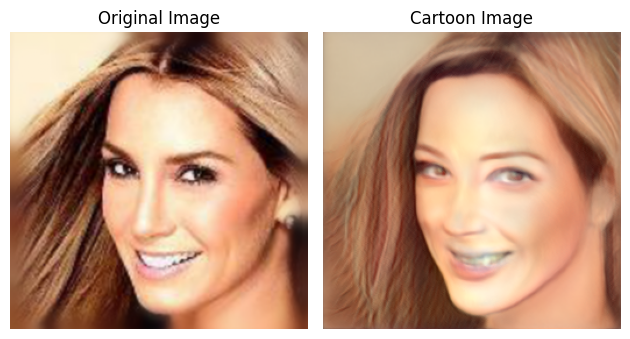

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to the images
og_image_path = '/content/projector/og/target.png'
im_image_path = '/content/projector/car/proj.png'

# Load the images
og_image = mpimg.imread(og_image_path)
im_image = mpimg.imread(im_image_path)

# Display the images side by side
fig, axes = plt.subplots(1, 2)
axes[0].imshow(og_image)
axes[0].set_title('Original Image')
axes[1].imshow(im_image)
axes[1].set_title('Cartoon Image')

# Remove axis ticks and labels
for ax in axes:
    ax.axis('off')

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

### Thank You!